In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ccxt
# Collecting stock historical data from yahoo
ticker = "ETH-USD"
start_date = "2018-02-01"
end_date = "2022-01-31"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset for inspection
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High         Low        Close    Adj Close  \
Date                                                                         
2018-02-01  1119.369995  1161.349976  984.818970  1036.790039  1036.790039   
2018-02-02  1035.770020  1035.770020  757.979980   915.784973   915.784973   
2018-02-03   919.210999   991.942993  847.690002   964.018982   964.018982   
2018-02-04   964.666992   969.031982  805.064026   834.682007   834.682007   
2018-02-05   834.958008   856.645996  644.598999   697.950989   697.950989   

                Volume  
Date                    
2018-02-01  5261680128  
2018-02-02  6713290240  
2018-02-03  3243480064  
2018-02-04  2997090048  
2018-02-05  4269530112  


In [3]:
X_features = ['Open', "Volume"]
target_column = 'Close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_test = data[X_features]
y_test = data[target_column]

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1460, 2)
Shape of X_test: (1460, 2)
Shape of y_train: (1460,)
Shape of y_test: (1460,)


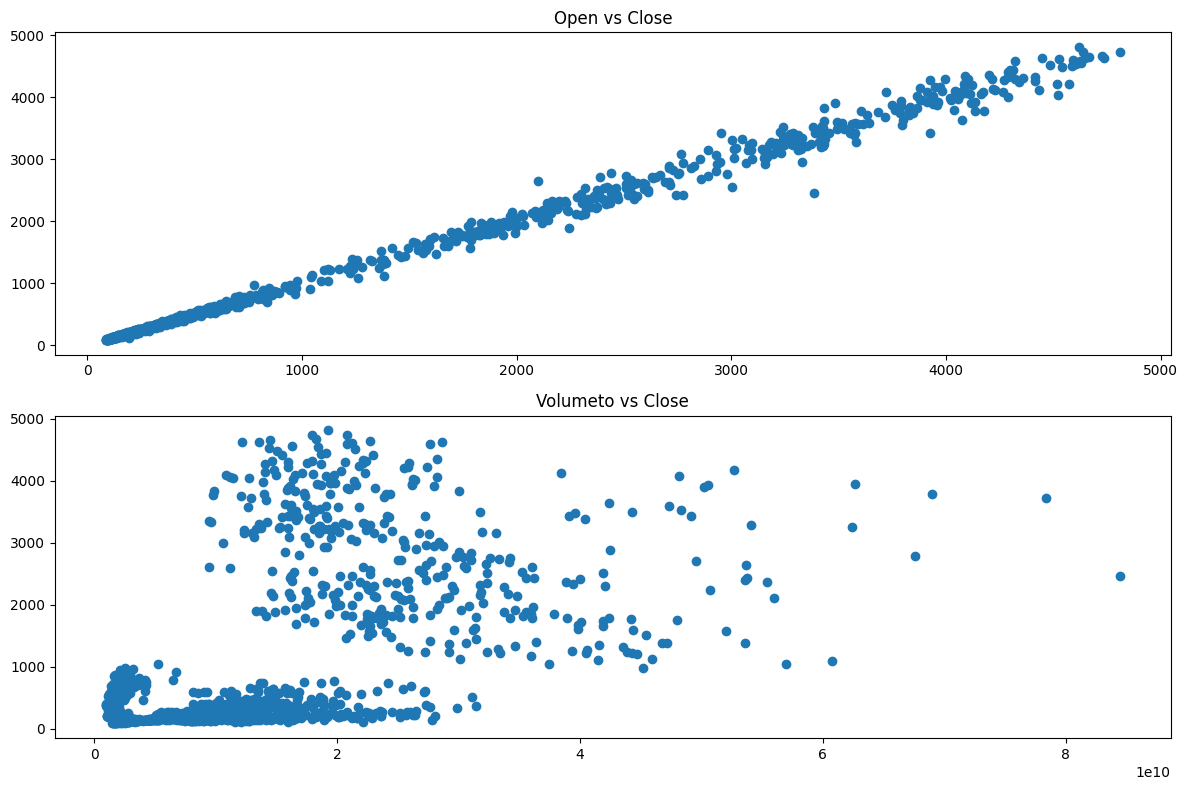

In [4]:
fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(X_train['Open'], y_train)
axs[0].set_title('Open vs Close')

axs[1].scatter(X_train['Volume'], y_train)
axs[1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [6]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [ 9.98320023e-01 -5.55707608e-11], b = 3.116659621780059


Training MSE: 6251.617029543891


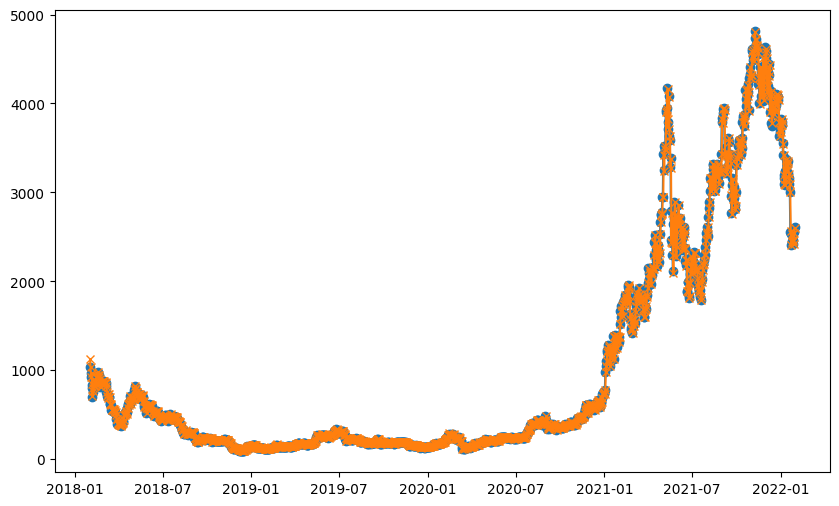

In [7]:
from sklearn.metrics import mean_squared_error

predictions = linear_model.predict(X_test).tolist()

time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column,y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column,predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE: {train_mse}")
plt.show()

Training MSE for quadratic polynomial: 73155.89470580063


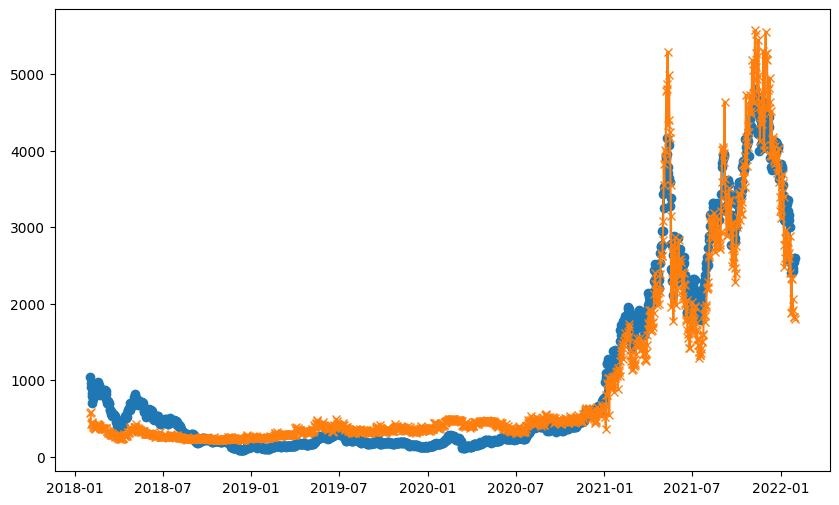

In [8]:
poly_features = PolynomialFeatures(2)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for quadratic polynomial: {train_mse}")
plt.show()